**Importing the Libraries**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [63]:
# load the credir approval datasets
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/loan_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/loan_test.csv")

In [64]:
df_train.head(7)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y


In [65]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [66]:
df_train.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [67]:
df_test.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
362,Male,Yes,3+,Not Graduate,Yes,400900,177700,11300000,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,415800,70900,11500000,360.0,1.0,Urban
364,Male,No,0,Graduate,No,325000,199300,12600000,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,500000,239300,15800000,360.0,1.0,Rural
366,Male,No,0,Graduate,Yes,920000,0,9800000,180.0,1.0,Rural


In [68]:
print(df_train.shape) # train dataset shape
df_train.columns

(614, 12)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [69]:
print(df_test.shape) # test dataset shape
df_test.columns

(367, 11)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area'],
      dtype='object')

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [71]:
df_train.select_dtypes(include='object').nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Area             3
Status           2
dtype: int64

In [72]:
df_train.duplicated().sum()

0

In [73]:
df_train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [74]:
check_missing = df_train.isnull().sum() * 100 / df_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History    8.143322
Self_Employed     5.211726
Dependents        2.442997
Term              2.280130
Gender            2.117264
Married           0.488599
dtype: float64

In [75]:
df_train.Gender.value_counts(dropna = False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

In [76]:
df_train.Term.value_counts(dropna = False)

Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [77]:
# convert selected columns to string data type
df_train[['Term', 'Credit_History']] = df_train[['Term', 'Credit_History']].astype(str)

In [78]:
# fulling the missing/null values
# train dataset
# categorical variables

df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace = True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace = True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace = True)
df_train['Term'].fillna(df_train['Term'].mode(), inplace = True)

In [79]:
df_train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


<ipython-input-80-33df2bfa17cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Area',data=df_train, palette = 'Set2')


<Axes: xlabel='Area', ylabel='count'>

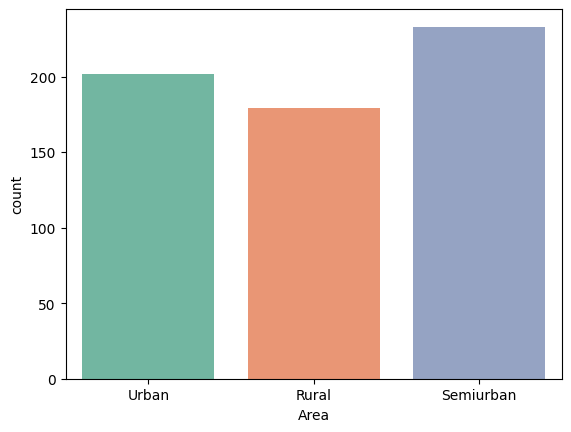

In [80]:
# visualize different area from where people apply for loan

print(df_train['Area'].value_counts())
sns.countplot(x='Area',data=df_train, palette = 'Set2')

<Figure size 700x500 with 0 Axes>

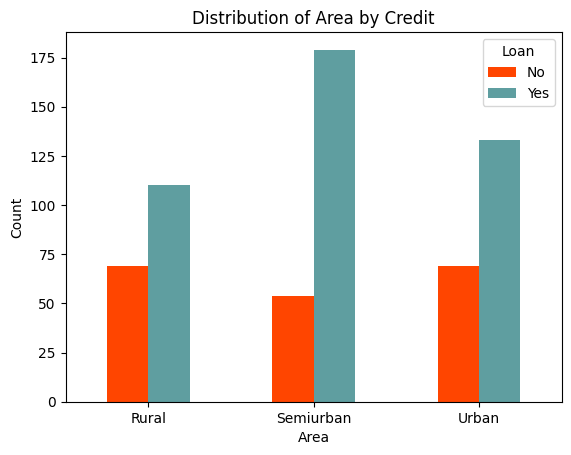

In [81]:
# we visualize the relationship between the "Area" and "Credit Status" columns using a bar chart

area_loan_counts = pd.crosstab(df_train['Area'], df_train['Status'])
plt.figure(figsize=(7, 5))
area_loan_counts.plot(kind='bar', color=['orangered', 'cadetblue'])
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Distribution of Area by Credit')
plt.legend(title='Loan', labels=['No', 'Yes'])
plt.xticks(rotation = 0)
plt.show()

Gender
Male      502
Female    112
Name: count, dtype: int64


<ipython-input-82-8a37298aae28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data = df_train, palette = 'Dark2')


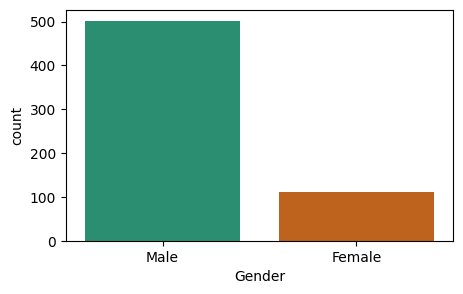

In [82]:
# visualize Gender types

print(df_train['Gender'].value_counts())
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data = df_train, palette = 'Dark2')
plt.show()

Married
Yes    401
No     213
Name: count, dtype: int64


<ipython-input-83-858f7023fda8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data = df_train, palette = 'Dark2')


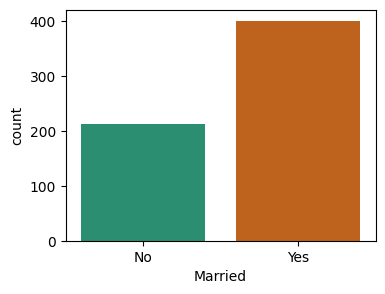

In [83]:
# visualize the number of people are Married

print(df_train['Married'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(x='Married', data = df_train, palette = 'Dark2')
plt.show()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-84-25eb23a64533>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=df_train, palette = 'Dark2')


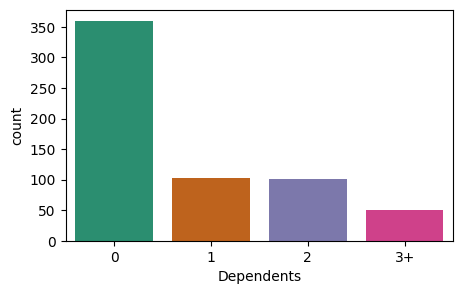

In [84]:
# Dependents
print(df_train['Dependents'].value_counts())
plt.figure(figsize=(5, 3))
sns.countplot(x='Dependents',data=df_train, palette = 'Dark2')
plt.show()

<Figure size 500x300 with 0 Axes>

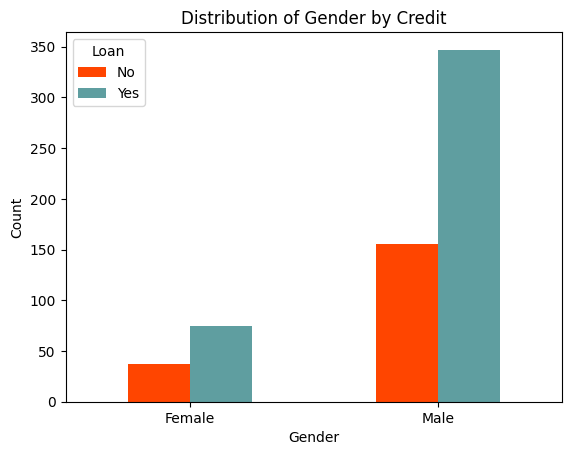

In [85]:
# we visualize the relationship between the "Gender" and "Credit Status" columns using a bar chart

gender_loan_counts = pd.crosstab(df_train['Gender'], df_train['Status'])
plt.figure(figsize=(5, 3))
gender_loan_counts.plot(kind='bar', color=['orangered', 'cadetblue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender by Credit')
plt.legend(title='Loan', labels=['No', 'Yes'])
plt.xticks(rotation = 0)
plt.show()

<Figure size 500x300 with 0 Axes>

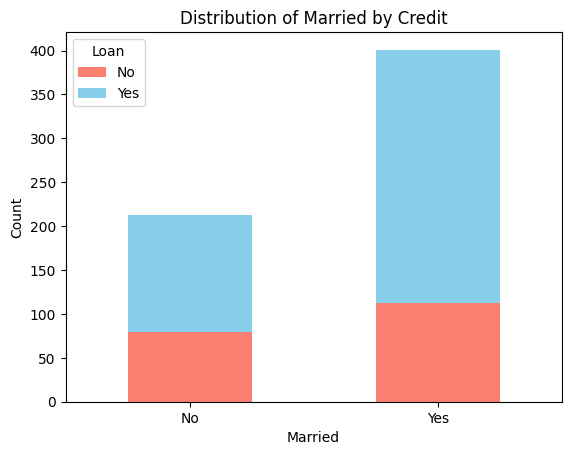

In [86]:
# visualize the relationship between the "Married" and "Credit Status" columns using a stacked bar chart.

cp_hd_counts = pd.crosstab(df_train['Married'], df_train['Status'])
plt.figure(figsize=(5, 3))
cp_hd_counts.plot(kind='bar', stacked = True, color=['salmon', 'skyblue'])
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Distribution of Married by Credit')
plt.legend(title='Loan', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

In [87]:
df_train.value_counts("Self_Employed")

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [88]:
df_train.value_counts("Status")

Status
Y    422
N    192
Name: count, dtype: int64

In [89]:
# find the columns with outliers value
# z score method
# Select only numerical columns for outlier detection
numerical_columns = df_train.select_dtypes(include=[np.number])

# Create an empty list to store columns with outliers
columns_with_outliers = []

for column in numerical_columns.columns:
    # Compute Z-scores for the current column
    z_scores = np.abs((df_train[column] - df_train[column].mean()) / df_train[column].std())

    # Define a threshold for considering an observation as an outlier (e.g., Z-score > 5)
    threshold = 5

    if any(z_scores > threshold):
        columns_with_outliers.append(column)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']


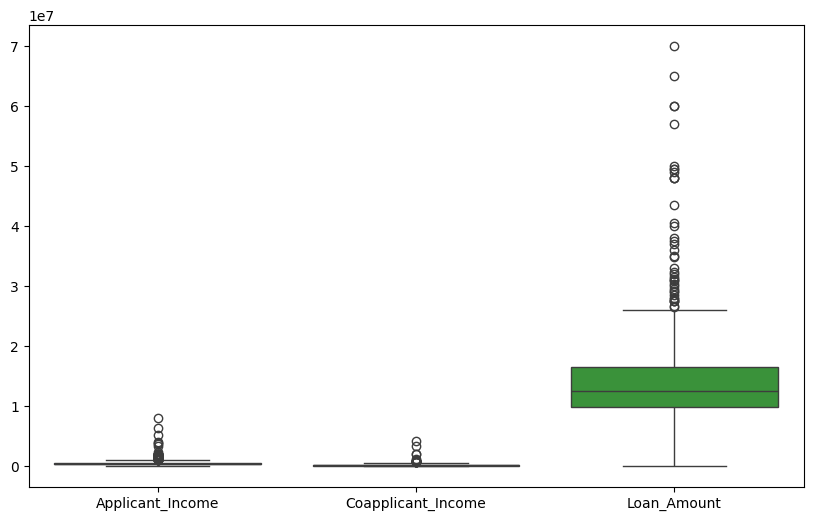

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_train, orient='v')
plt.show()

In [91]:
# removing the outiers
# Define a function to remove outliers based on IQR

def remove_outliers_iqr(df_train, column):
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_train[(df_train[column] >= lower_bound) & (df_train[column] <= upper_bound)]

# Apply outlier removal to the dataset (df_train)
columns_with_outliers = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']
for column in columns_with_outliers:
    df_train = remove_outliers_iqr(df_train, column)

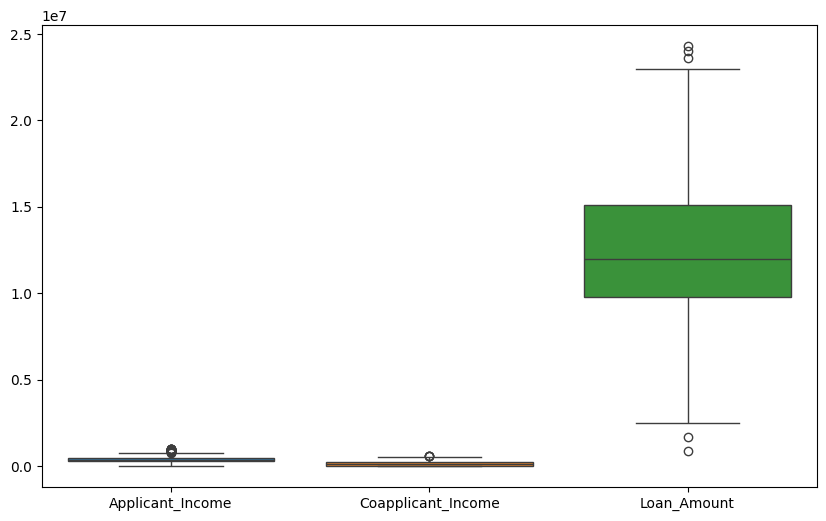

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_train, orient='v')
plt.show()

In [93]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Applicant_Income,505.0,3.989184e+05,1.785426e+05,15000.0,275000.0,358300.0,475800.0,1000000.0
Coapplicant_Income,505.0,1.322053e+05,1.404211e+05,0.0,0.0,128700.0,220000.0,570100.0
Loan_Amount,505.0,1.235604e+07,4.161092e+06,900000.0,9800000.0,12000000.0,15100000.0,24300000.0


In [94]:
# df_train.corr()
df_train.select_dtypes(include=['int', 'float']).corr()

,Applicant_Income,Coapplicant_Income,Loan_Amount
Applicant_Income,1.000000,-0.268918,0.451292
Coapplicant_Income,-0.268918,1.000000,0.319559
Loan_Amount,0.451292,0.319559,1.000000


<Axes: >

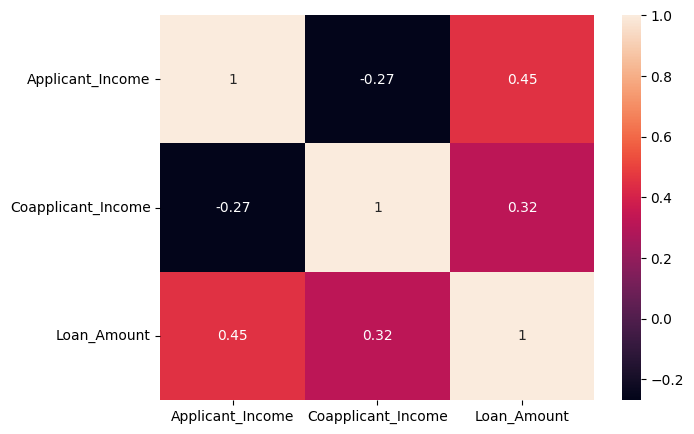

In [95]:
plt.figure(figsize=(7, 5))
sns.heatmap(df_train.select_dtypes(include=['int', 'float']).corr(), annot=True, cmap='rocket')

<ipython-input-96-8221728f5498>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-96-8221728f5498>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-96-8221728f5498>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-96-8221728f5498>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-96-8221728f5498>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-96-8221728f5498>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_x

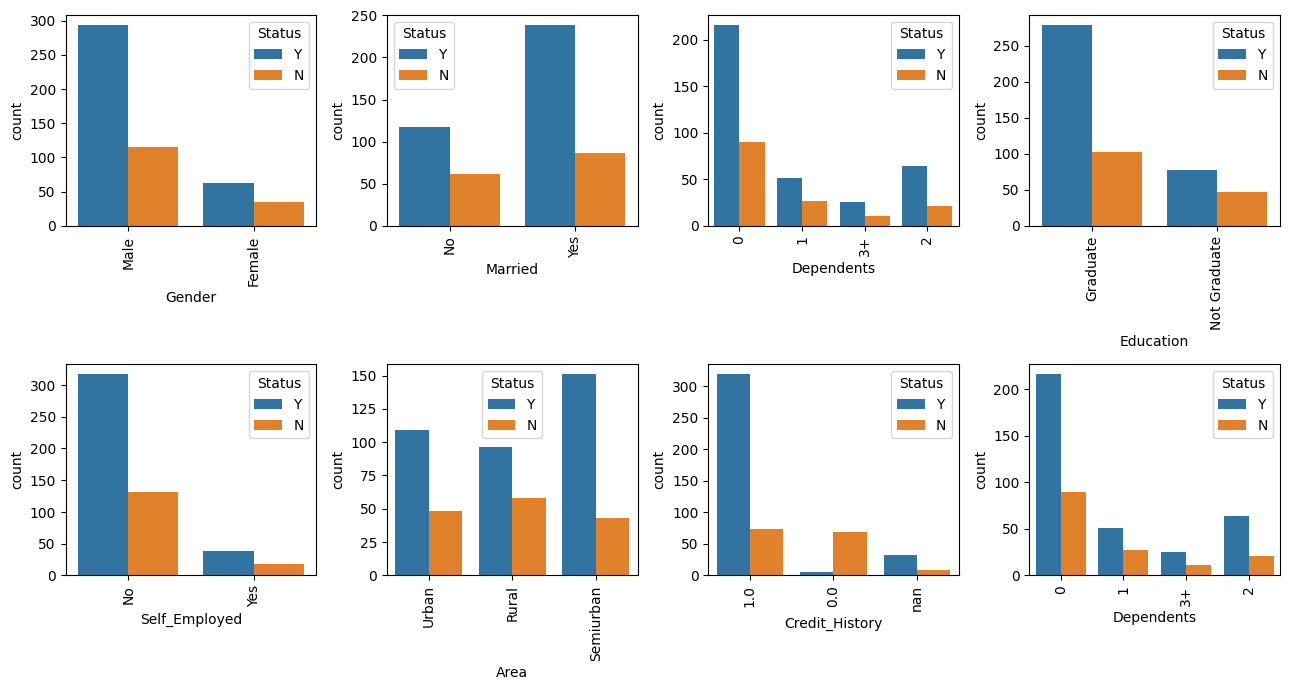

In [96]:
# list of categorical variables to plot
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Area', 'Credit_History', 'Dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(13, 7))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Status', data=df_train, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()
plt.show()

<Figure size 500x300 with 0 Axes>

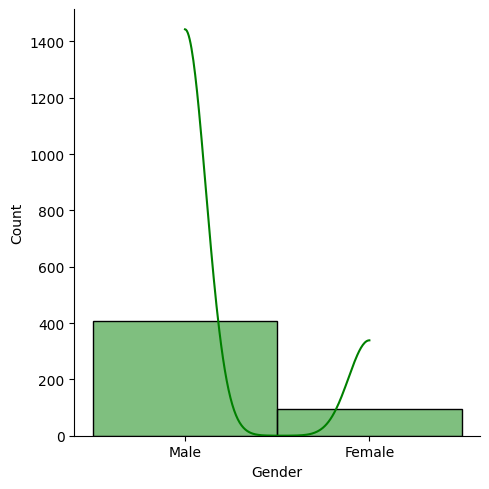

<Figure size 500x300 with 0 Axes>

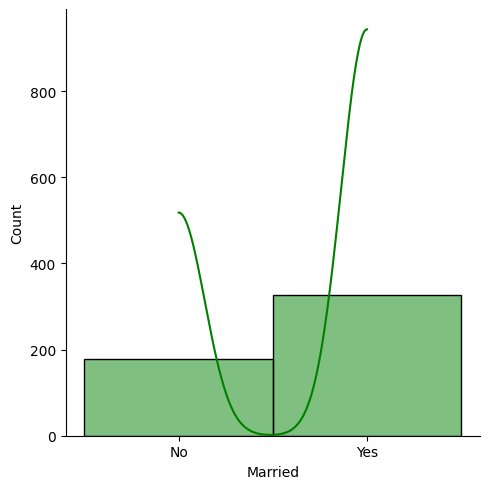

<Figure size 500x300 with 0 Axes>

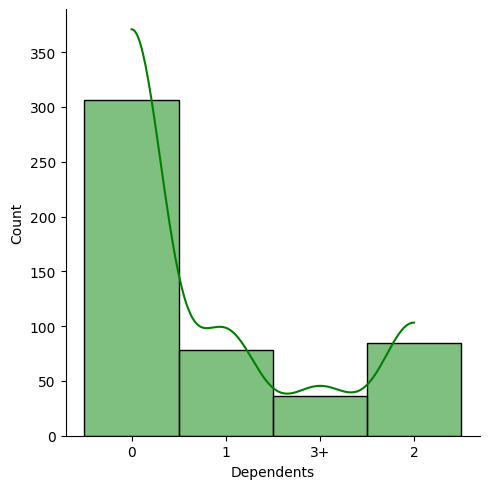

<Figure size 500x300 with 0 Axes>

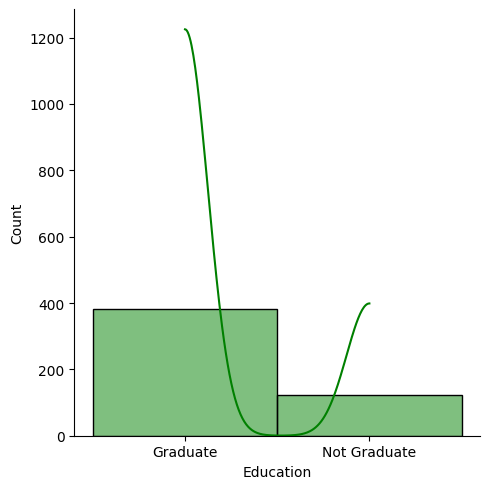

<Figure size 500x300 with 0 Axes>

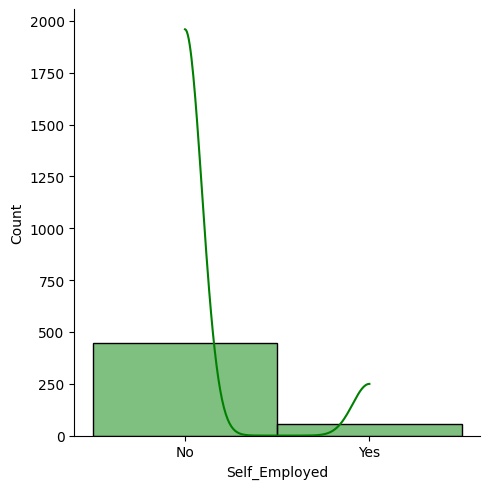

<Figure size 500x300 with 0 Axes>

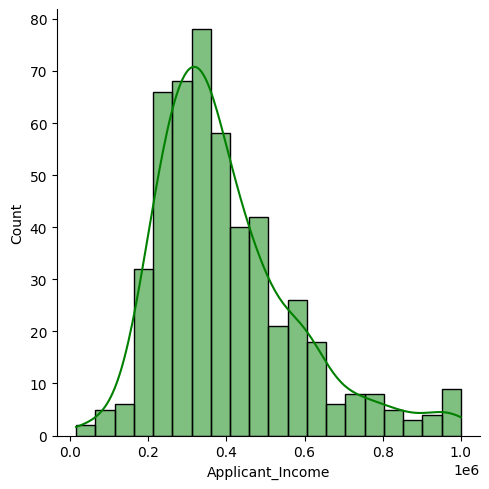

<Figure size 500x300 with 0 Axes>

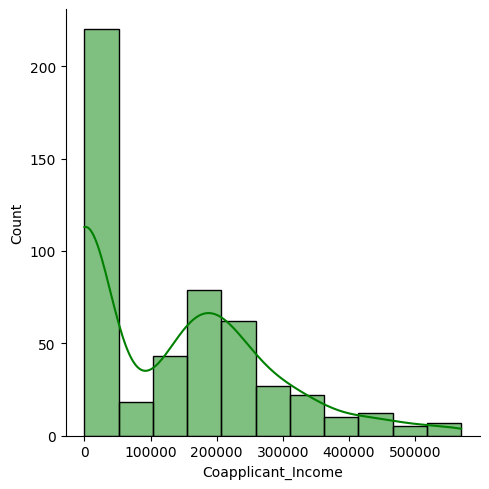

<Figure size 500x300 with 0 Axes>

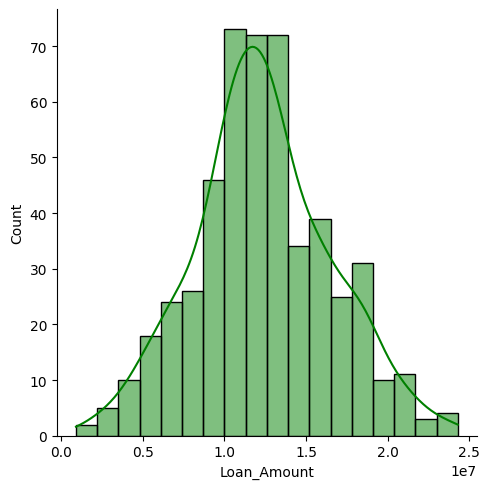

<Figure size 500x300 with 0 Axes>

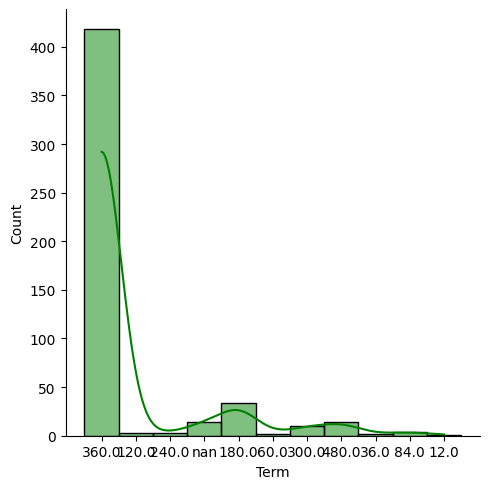

<Figure size 500x300 with 0 Axes>

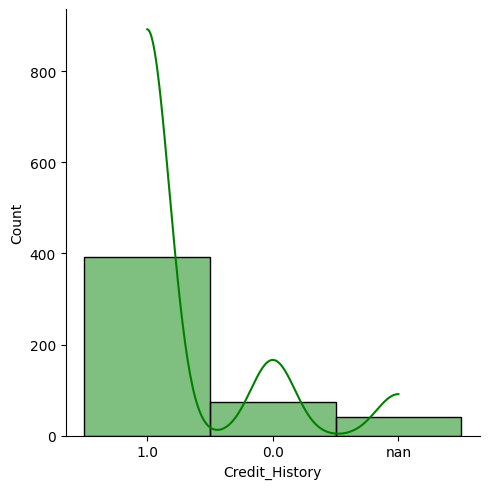

<Figure size 500x300 with 0 Axes>

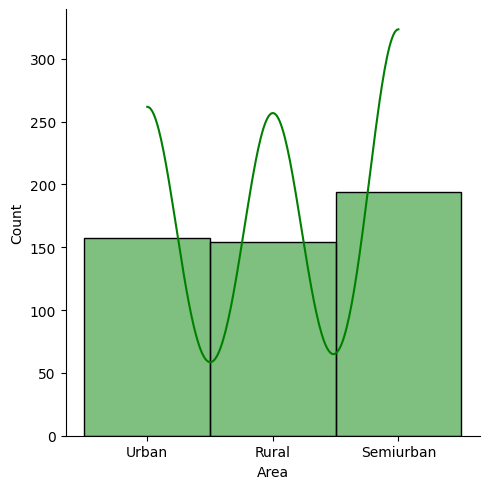

<Figure size 500x300 with 0 Axes>

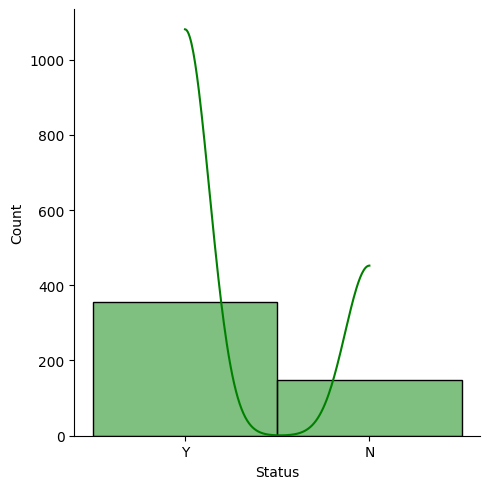

In [97]:
for c in df_train.columns:
    plt.figure(figsize=(5,3))
    sns.displot(data = df_train[c], kde= True, color='green')
    plt.show()

In [98]:
df_1 = df_train.copy() # copy the dataset

In [99]:
# Label Encoding
df_1['Gender'] = label.fit_transform(df_1['Gender'])    #transfrom the strings in numeric values

df_1['Married'] = label.fit_transform(df_1['Married'])

df_1['Dependents'] = label.fit_transform(df_1['Dependents'])

df_1['Education'] = label.fit_transform(df_1['Education'])

df_1['Self_Employed'] = label.fit_transform(df_1['Self_Employed'])

df_1['Area'] = label.fit_transform(df_1['Area'])

df_1['Credit_History'] = label.fit_transform(df_1['Credit_History'])

df_1['Term'] = label.fit_transform(df_1['Term'])

In [100]:
df_train.value_counts('Term')

Term
360.0    418
180.0     34
480.0     14
nan       14
300.0     10
84.0       4
120.0      3
240.0      3
36.0       2
60.0       2
12.0       1
Name: count, dtype: int64

In [101]:
df_1.value_counts('Term')

Term
6     418
2      34
7      14
10     14
4      10
9       4
1       3
3       3
5       2
8       2
0       1
Name: count, dtype: int64

In [102]:
x = df_1.drop('Status', axis=1)
y = df_1['Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
608    Y
609    Y
610    Y
612    Y
613    N
Name: Status, Length: 505, dtype: object

In [103]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

In [104]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X_scaled, y)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.25, random_state = 42)

In [106]:
# Support vector machine
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100],
             'gamma': [0.25, 0.75, 0.5, 1],
             'kernel': ['linear', 'rbf', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.701 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.682 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.636 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.748 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.717 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.654 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.673 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.664 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.617 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.708 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.25, kernel=poly;, score=0.804 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.25, kernel=poly

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [107]:
svm = SVC(C= 10, gamma = 1, kernel ='rbf')
svm_m = svm.fit(X_train, y_train)
svm_pred = svm_m.predict(X_test)
svm_as = accuracy_score(y_test, svm_pred) * 100
svm_as = "{:.2f}".format(svm_as)
print('Accuracy of SVM:', svm_as)

print("Classification Report:")
print(classification_report(y_test, svm_pred))

Accuracy of SVM: 89.33
Classification Report:
              precision    recall  f1-score   support

           N       0.91      0.88      0.89        88
           Y       0.88      0.91      0.90        90

    accuracy                           0.89       178
   macro avg       0.89      0.89      0.89       178
weighted avg       0.89      0.89      0.89       178



In [108]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rf_m = rfc.fit(X_train, y_train)
rf_pred = rf_m.predict(X_test)
rf_as = accuracy_score(y_test, rf_pred) * 100
rf_as = "{:.2f}".format(rf_as)
print("Accuracy of RF:", rf_as)

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy of RF: 93.82
Classification Report:
              precision    recall  f1-score   support

           N       0.93      0.94      0.94        88
           Y       0.94      0.93      0.94        90

    accuracy                           0.94       178
   macro avg       0.94      0.94      0.94       178
weighted avg       0.94      0.94      0.94       178



In [109]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc_m = gbc.fit(X_train, y_train)
gbc_pred = gbc_m.predict(X_test)
gb_as = accuracy_score(y_test, gbc_pred) * 100
gb_as = "{:.2f}".format(gb_as)
print("Accuracy of Gradient Boost:", gb_as)

print("Classification Report: ")
print(classification_report(y_test, gbc_pred))

Accuracy of Gradient Boost: 88.20
Classification Report: 
              precision    recall  f1-score   support

           N       0.96      0.80      0.87        88
           Y       0.83      0.97      0.89        90

    accuracy                           0.88       178
   macro avg       0.89      0.88      0.88       178
weighted avg       0.89      0.88      0.88       178



In [110]:
from sklearn.ensemble import VotingClassifier
two_cla_1 = VotingClassifier(estimators=[('LG', gbc),('RF', rfc)], voting='soft')
two_cla_1.fit(X_train, y_train)
pred_1 = two_cla_1.predict(X_test)
print('Accuracy: %.2f' % (accuracy_score(y_test, pred_1) * 100))
print(classification_report(y_test, pred_1))

Accuracy: 94.94
              precision    recall  f1-score   support

           N       0.96      0.93      0.95        88
           Y       0.94      0.97      0.95        90

    accuracy                           0.95       178
   macro avg       0.95      0.95      0.95       178
weighted avg       0.95      0.95      0.95       178



In [111]:
# saving the best model

import pickle

pickle.dump(rf_m, open('model.pkl', 'wb'))

**Run the Random Forest model on Test dataset**

In [112]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,400900,177700,11300000,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,415800,70900,11500000,360.0,1.0,Urban
364,Male,No,0,Graduate,No,325000,199300,12600000,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,500000,239300,15800000,360.0,1.0,Rural


In [113]:
# convert selected columns to string data type
df_test[['Term', 'Credit_History']] = df_test[['Term', 'Credit_History']].astype(str)

In [114]:
df_test.isnull().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
dtype: int64

In [115]:
df_test.dropna(inplace = True)

In [116]:
df_test_1 = df_test.copy() # copy the dataset

In [117]:
# Label Encoding
df_test_1['Gender'] = label.fit_transform(df_test_1['Gender'])    #transfrom the strings in numeric values

df_test_1['Married'] = label.fit_transform(df_test_1['Married'])

df_test_1['Dependents'] = label.fit_transform(df_test_1['Dependents'])

df_test_1['Education'] = label.fit_transform(df_test_1['Education'])

df_test_1['Self_Employed'] = label.fit_transform(df_test_1['Self_Employed'])

df_test_1['Area'] = label.fit_transform(df_test_1['Area'])

df_test_1['Credit_History'] = label.fit_transform(df_test_1['Credit_History'])

df_test_1['Term'] = label.fit_transform(df_test_1['Term'])

In [118]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_test_1)
X_scaled = scaler.transform(df_test_1)

In [119]:
model = pickle.load(open("model.pkl", "rb"))

In [120]:
test_dataset_pred = model.predict(df_test_1)
test_dataset_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [121]:
df_test_1['Status'] = test_dataset_pred

In [122]:
df_test_1

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,1,0,0,0,572000,0,11000000,7,1,2,Y
1,1,1,1,0,0,307600,150000,12600000,7,1,2,Y
2,1,1,2,0,0,500000,180000,20800000,7,1,2,Y
3,1,1,2,0,0,234000,254600,10000000,7,2,2,Y
4,1,0,0,1,0,327600,0,7800000,7,1,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,400900,177700,11300000,7,1,2,Y
363,1,1,0,0,0,415800,70900,11500000,7,1,2,Y
364,1,0,0,0,0,325000,199300,12600000,7,2,1,N
365,1,1,0,0,0,500000,239300,15800000,7,1,0,Y
